In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel('C:/Users/ELCOT/Downloads/train.xlsx')

In [405]:
df_prev = pd.read_excel('C:/Users/ELCOT/Downloads/train.xlsx')

In [30]:
R_df = pd.read_excel('C:/Users/ELCOT/Downloads/train.xlsx')

In [46]:
R_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
R_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
def outliers(column):
    maxi=np.percentile(R_df[column],99)
    mini=np.percentile(R_df[column],1)
    print("Max",maxi)
    print("Min",mini)
    for i in range(0,len(R_df[column])):
        if(R_df[column][i]>maxi):
            R_df[column][i]=maxi
        elif(R_df[column][i]<mini):
            R_df[column][i]=mini

In [42]:
outliers('age')

Max 71.0
Min 23.0


<ipython-input-41-8078563d6657>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=mini
<ipython-input-41-8078563d6657>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=maxi


In [47]:
outliers('balance')


Max 13164.900000000001
Min -627.0


<ipython-input-41-8078563d6657>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=mini
<ipython-input-41-8078563d6657>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=maxi


In [48]:
R_df['balance'].describecribe()

count    45211.000000
mean      1278.112672
std       2249.359317
min       -627.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max      13164.000000
Name: balance, dtype: float64

In [49]:
outliers('duration')

Max 1269.0
Min 11.0


<ipython-input-41-8078563d6657>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=maxi
<ipython-input-41-8078563d6657>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=mini


In [50]:
outliers('campaign')

Max 16.0
Min 1.0


<ipython-input-41-8078563d6657>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df[column][i]=maxi


In [51]:

R_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.887660,1278.112672,15.806419,254.375993,2.691403,40.197828,0.580323
std,10.384267,2249.359317,8.322476,234.779511,2.585740,100.128746,2.303441
min,23.000000,-627.000000,1.000000,11.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,71.000000,13164.000000,31.000000,1269.000000,16.000000,871.000000,275.000000


In [53]:
R_df_2= R_df.drop(['default','loan','pdays','previous','poutcome'], axis='columns')

In [54]:
R_df_2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no


In [59]:
R_df_2['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [63]:
R_df_2['job'].value_counts(normalize=True)*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [64]:
R_df_2['job_new']= R_df_2['job']

In [65]:
R_df_2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,entrepreneur
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unknown


In [80]:
for i in range(0,len(R_df_2['job'])):
        if(R_df_2['job'][i]== ('housemaid') or R_df_2['job'][i]== ('self-employed') or R_df_2['job'][i]== ('entrepreneur')):
            R_df_2['job_new'][i]= 'self-employed'
        elif(R_df_2['job'][i]== ('unemployed') or R_df_2['job'][i]== ('student') or R_df_2['job'][i]== ('unknown')):  
            R_df_2['job_new'][i]='unemployed'

<ipython-input-80-0f427ffba786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_2['job_new'][i]= 'self-employed'
<ipython-input-80-0f427ffba786>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_2['job_new'][i]='unemployed'


In [81]:
R_df_2['job_new'].unique()

array(['management', 'technician', 'self-employed', 'blue-collar',
       'unemployed', 'retired', 'admin.', 'services'], dtype=object)

In [82]:
R_df_2['job_new'].value_counts(normalize=True)*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
self-employed     9.524231
services          9.188029
unemployed        5.593771
retired           5.007631
Name: job_new, dtype: float64

In [83]:
R_df_2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed


In [84]:
R_df_2['month_new']= R_df_2['month']

In [86]:
R_df_2['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [87]:
for i in range(0,len(R_df_2['month'])):
        if(R_df_2['month'][i]== ('jan') or R_df_2['month'][i]== ('feb') or R_df_2['month'][i]== ('mar')):
            R_df_2['month_new'][i]= 'Q1'
        elif(R_df_2['month'][i]== ('apr') or R_df_2['month'][i]== ('may') or R_df_2['month'][i]== ('jun')):
            R_df_2['month_new'][i]= 'Q2'
        elif(R_df_2['month'][i]== ('jul') or R_df_2['month'][i]== ('aug') or R_df_2['month'][i]== ('sep')):
            R_df_2['month_new'][i]= 'Q3'
        elif(R_df_2['month'][i]== ('oct') or R_df_2['month'][i]== ('nov') or R_df_2['month'][i]== ('dec')):
            R_df_2['month_new'][i]= 'Q4'

<ipython-input-87-2f7af9a4b783>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_2['month_new'][i]= 'Q2'
<ipython-input-87-2f7af9a4b783>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_2['month_new'][i]= 'Q3'
<ipython-input-87-2f7af9a4b783>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_2['month_new'][i]= 'Q4'
<ipython-input-87-2f7af9a4b783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [88]:
R_df_2['month_new'].unique()

array(['Q2', 'Q3', 'Q4', 'Q1'], dtype=object)

In [89]:
R_df_2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2


In [91]:
R_df_2['age'].describe()

count    45211.000000
mean        40.887660
std         10.384267
min         23.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

(array([11111., 16139.,  9642.,  7278.,  1041.]),
 array([23. , 32.6, 42.2, 51.8, 61.4, 71. ]),
 <BarContainer object of 5 artists>)

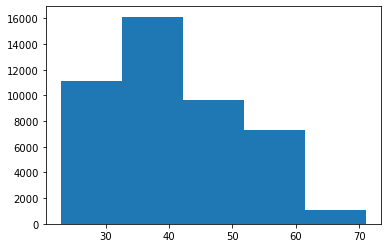

In [96]:
plt.hist(R_df_2['age'],bins=5)

In [108]:
R_df_3=R_df_2.drop(['age_new'],axis=1)


In [109]:
R_df_3.head()


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2


In [110]:
R_df_3['age_bin']=R_df_3['age']

In [111]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,58
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,44
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,33
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,47
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,33


In [113]:
for i in range (0, len(R_df_3['age'])):
    if(R_df_3['age'][i]>=23 and R_df_3['age'][i]<=32 ):
        R_df_3['age_bin'][i]=1
    elif(R_df_3['age'][i]>=33 and R_df_3['age'][i]<=42 ):
        R_df_3['age_bin'][i]=2
    elif(R_df_3['age'][i]>=43 and R_df_3['age'][i]<=51 ):
        R_df_3['age_bin'][i]=3
    elif(R_df_3['age'][i]>=52 and R_df_3['age'][i]<=61 ):
        R_df_3['age_bin'][i]=4
    else:
        R_df_3['age_bin'][i]=5
        

<ipython-input-113-6f7a8934b25c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['age_bin'][i]=4
<ipython-input-113-6f7a8934b25c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['age_bin'][i]=3
<ipython-input-113-6f7a8934b25c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['age_bin'][i]=2
<ipython-input-113-6f7a8934b25c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [114]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2


In [115]:
R_df_3['week_of_the_month']=R_df_3['day']

In [116]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin,week_of_the_month
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4,5
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3,5
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2,5
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3,5
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2,5


In [119]:
for i in range (0, len(R_df_3['day'])):
    if(R_df_3['day'][i]>=1 and R_df_3['day'][i]<=7 ):
        R_df_3['week_of_the_month'][i]=1
    elif(R_df_3['day'][i]>=8 and R_df_3['day'][i]<=14 ):
        R_df_3['week_of_the_month'][i]=2
    elif(R_df_3['day'][i]>=15 and R_df_3['day'][i]<=21 ):
        R_df_3['week_of_the_month'][i]=3
    else:
        R_df_3['week_of_the_month'][i]=4

<ipython-input-119-e5a98815339a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['week_of_the_month'][i]=1
<ipython-input-119-e5a98815339a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['week_of_the_month'][i]=2
<ipython-input-119-e5a98815339a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['week_of_the_month'][i]=3
<ipython-input-119-e5a98815339a>:9: SettingWithCopyWarning: 
A value is trying to be set on a 

In [122]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin,week_of_the_month
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4,1
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2,1
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2,1


(array([10917., 16900.,  6174.,  3165.,  2046.,  1374.,   972.,   703.,
          584.,   407.,   318.,   256.,   251.,   157.,   125.,   109.,
           81.,    79.,    69.,   524.]),
 array([ -627.  ,    62.55,   752.1 ,  1441.65,  2131.2 ,  2820.75,
         3510.3 ,  4199.85,  4889.4 ,  5578.95,  6268.5 ,  6958.05,
         7647.6 ,  8337.15,  9026.7 ,  9716.25, 10405.8 , 11095.35,
        11784.9 , 12474.45, 13164.  ]),
 <BarContainer object of 20 artists>)

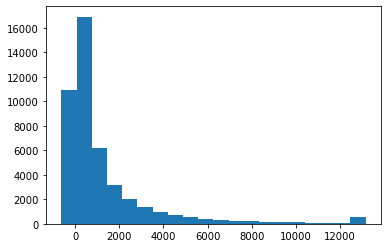

In [157]:
plt.hist(R_df_3['balance'],bins=20)


In [141]:
len(R_df_3[R_df_3['balance']>=3971])/len(R_df_3)

0.08701422220256132

In [172]:
a=len(R_df_3[R_df_3['balance']>=151 ])
b=len(R_df_3[R_df_3['balance']>=800 ] )
c=len(R_df_3)
print((a-b)/c)

0.31264515272831833


In [160]:
a=len(R_df_3[R_df_3['balance']>=-627 ])
b=len(R_df_3[R_df_3['balance']>=150] )
c=len(R_df_3)
print((a-b)/c)

0.3150339519143571


In [188]:
a=len(R_df_3[R_df_3['balance']>=801 ])
b=len(R_df_3[R_df_3['balance']>=4500] )
c=len(R_df_3)
print((a-b)/c)

0.2970737209971025


In [187]:
a=len(R_df_3[R_df_3['balance']>=4501 ])
b=len(R_df_3[R_df_3['balance']>=13164] )
c=len(R_df_3)
print((a-b)/c)

0.06407732631439252


In [189]:
R_df_3['balance_bin']=R_df_3['balance']

In [190]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin,week_of_the_month,balance_bin
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4,1,2143
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3,1,29
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2,1,2
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3,1,1506
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2,1,1


In [191]:
for i in range (0, len(R_df_3['balance'])):
    if(R_df_3['balance'][i]>=-627 and R_df_3['balance'][i]<=150 ):
        R_df_3['balance_bin'][i]=1
    elif(R_df_3['balance'][i]>=151 and R_df_3['balance'][i]<=800 ):
        R_df_3['balance_bin'][i]=2
    elif(R_df_3['balance'][i]>=801 and R_df_3['balance'][i]<=4500 ):
        R_df_3['balance_bin'][i]=3
    else:
        R_df_3['balance_bin'][i]=4

<ipython-input-191-fdf74fd250ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_bin'][i]=3
<ipython-input-191-fdf74fd250ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_bin'][i]=1
<ipython-input-191-fdf74fd250ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_bin'][i]=2
<ipython-input-191-fdf74fd250ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [192]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin,week_of_the_month,balance_bin
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4,1,3
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3,1,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2,1,1
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3,1,3
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2,1,1


In [229]:
R_df_3['balance_inv']= R_df_3['balance']

In [230]:
R_df_3[['balance','balance_inv']].head()

,balance,balance_inv
0,2143,2143
1,29,29
2,2,2
3,1506,1506
4,1,1


In [231]:
for i in range (0, len(R_df_3['balance'])):
    if(R_df_3['balance'][i]!=0):
        inv=1.0/(R_df_3['balance'][i])
        R_df_3['balance_inv'][i]=float(inv)

<ipython-input-231-a1d07bb9cb5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_inv'][i]=float(inv)


In [232]:
R_df_3[['balance','balance_inv']]

,balance,balance_inv
0,2143,0
1,29,0
2,2,0
3,1506,0
4,1,1
...,...,...
45206,825,0
45207,1729,0
45208,5715,0
45209,668,0


In [233]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,job_new,month_new,age_bin,week_of_the_month,balance_bin,balance_inv,balance_log
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,no,management,Q2,4,1,3,0,2143
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,no,technician,Q2,3,1,1,0,29
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,no,self-employed,Q2,2,1,1,0,2
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,no,blue-collar,Q2,3,1,3,0,1506
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,no,unemployed,Q2,2,1,1,1,1


In [234]:
R_df_3['balance_log']= R_df_3['balance']

In [343]:
import math
for i in range (0, len(R_df_3['balance'])):
    if(R_df_3['balance'][i]>0):
        log=math.log(R_df_3['balance'][i])
    elif(R_df_3['balance'][i]<0):
        log=math.log(R_df_3['balance'][i]*-1)*-1
    R_df_3['balance_log'][i]=log

<ipython-input-343-699e3341b99a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_log'][i]=log


In [236]:
R_df_3[['balance','balance_log']]

,balance,balance_log
0,2143,7
1,29,3
2,2,0
3,1506,7
4,1,0
...,...,...
45206,825,6
45207,1729,7
45208,5715,8
45209,668,6


In [245]:
R_df_3['balance_^2']= R_df_3['balance']
R_df_3['balance_^3']= R_df_3['balance']
R_df_3['balance_sqrt']= R_df_3['balance']
R_df_3['balance_cubert']= R_df_3['balance']
R_df_3['balance_sin']= R_df_3['balance']
R_df_3['balance_cos']= R_df_3['balance']
R_df_3['balance_e^x']= R_df_3['balance']

In [247]:
import math
for i in range (0, len(R_df_3['balance'])):
    x=R_df_3['balance'][i]
    sq=x*x
    cb=x*x*x
    sin=math.sin(x)
    cos=math.cos(x)

    if(x>=0):
        sqrt=x**(1.0/2)
        cbrt=x**(1.0/3)
    else:
        x=abs(x)
        sqrt=x**(1.0/2)*(-1)
        cbrt=x**(1.0/3)*(-1)
    
    R_df_3['balance_^2'][i]=sq
    R_df_3['balance_^3'][i]=cb
    R_df_3['balance_sqrt'][i]=sqrt
    R_df_3['balance_cubert'][i]=cbrt
    R_df_3['balance_sin'][i]=sin
    R_df_3['balance_cos'][i]=cos


<ipython-input-247-bf4fa73f285a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_^2'][i]=sq
<ipython-input-247-bf4fa73f285a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_^3'][i]=cb
<ipython-input-247-bf4fa73f285a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['balance_sqrt'][i]=sqrt
<ipython-input-247-bf4fa73f285a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [248]:
R_df_3[['balance','balance_^2','balance_^3','balance_sqrt','balance_cubert','balance_sin','balance_cos']]

,balance,balance_^2,balance_^3,balance_sqrt,balance_cubert,balance_sin,balance_cos
0,2143,4592449,9841618207,46,12,0,0
1,29,841,24389,5,3,0,0
2,2,4,8,1,1,0,0
3,1506,2268036,3415662216,38,11,0,0
4,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...
45206,825,680625,561515625,28,9,0,0
45207,1729,2989441,5168743489,41,12,0,0
45208,5715,32661225,186658900875,75,17,0,0
45209,668,446224,298077632,25,8,0,0


In [272]:
R_df_3['balance_^2'].describe()

count    4.521100e+04
mean     6.693077e+06
std      2.327611e+07
min      0.000000e+00
25%      1.876900e+04
50%      2.352250e+05
75%      2.039184e+06
max      1.732909e+08
Name: balance_^2, dtype: float64

In [274]:
np.percentile(R_df_3['balance_^2'],99)

173290896.0

(array([14913., 13686.,  7010.,  3573.,  2014.,  1311.,   833.,   569.,
          374.,   273.,   655.]),
 array([  11.        ,  125.36363636,  239.72727273,  354.09090909,
         468.45454545,  582.81818182,  697.18181818,  811.54545455,
         925.90909091, 1040.27272727, 1154.63636364, 1269.        ]),
 <BarContainer object of 11 artists>)

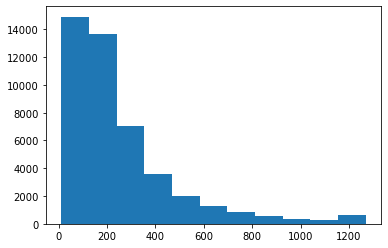

In [285]:
plt.hist(R_df_3['duration'],bins=11)

In [333]:
a=len(R_df_3[R_df_3['duration']>=11])
b=len(R_df_3[R_df_3['duration']>=125])
print((a-b)/len(R_df_3))

0.32620379996018667


In [334]:
a=len(R_df_3[R_df_3['duration']>=126])
b=len(R_df_3[R_df_3['duration']>=250])
print((a-b)/len(R_df_3))

0.32151467563203645


In [335]:
a=len(R_df_3[R_df_3['duration']>=251])
b=len(R_df_3[R_df_3['duration']>=630])
print((a-b)/len(R_df_3))

0.2712835371922762


In [336]:
a=len(R_df_3[R_df_3['duration']>=631])
b=len(R_df_3[R_df_3['duration']>=1269])
print((a-b)/len(R_df_3))

0.06511689633053903


In [338]:
R_df_3['duration_bin']=R_df_3['duration']

In [339]:
for i in range (0, len(R_df_3['duration'])):
    if(R_df_3['duration'][i]>=-11 and R_df_3['duration'][i]<=125 ):
        R_df_3['duration_bin'][i]=1
    elif(R_df_3['duration'][i]>=126 and R_df_3['duration'][i]<=250 ):
        R_df_3['duration_bin'][i]=2
    elif(R_df_3['duration'][i]>=251 and R_df_3['duration'][i]<=630 ):
        R_df_3['duration_bin'][i]=3
    else:
        R_df_3['duration_bin'][i]=4

<ipython-input-339-f5b751a0cd3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_bin'][i]=3
<ipython-input-339-f5b751a0cd3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_bin'][i]=2
<ipython-input-339-f5b751a0cd3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_bin'][i]=1
<ipython-input-339-f5b751a0cd3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [340]:
R_df_3['duration_inv']= R_df_3['duration']
R_df_3['duration_log']= R_df_3['duration']
R_df_3['duration_^2']= R_df_3['duration']
R_df_3['duration_^3']= R_df_3['duration']
R_df_3['duration_sqrt']= R_df_3['duration']
R_df_3['duration_cubert']= R_df_3['duration']
R_df_3['duration_sin']= R_df_3['duration']
R_df_3['duration_cos']= R_df_3['duration']
R_df_3['duration_e^x']= R_df_3['duration']

In [346]:
import math
for i in range (0, len(R_df_3['duration'])):
    x=R_df_3['duration'][i]
    inv=0
    log=0
    sq=x*x
    cb=x*x*x
    sin=math.sin(x)
    cos=math.cos(x)
    if(x!=0):
        inv=1.0/x
    if(x>0):
        log = math.log(x)
    elif(x<0):
        log = math.log(x*-1)*-1
    if(x>=0):
        sqrt=x**(1.0/2)
        cbrt=x**(1.0/3)
    else:
        x=abs(x)
        sqrt=x**(1.0/2)*(-1)
        cbrt=x**(1.0/3)*(-1)
    R_df_3['duration_inv'][i]=inv
    R_df_3['duration_^2'][i]=sq
    R_df_3['duration_^3'][i]=cb
    R_df_3['duration_sqrt'][i]=sqrt
    R_df_3['duration_cubert'][i]=cbrt
    R_df_3['duration_sin'][i]=sin
    R_df_3['duration_cos'][i]=cos
    R_df_3['duration_log'][i]=log

<ipython-input-346-2fc591c4bcbc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_inv'][i]=inv
<ipython-input-346-2fc591c4bcbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_^2'][i]=sq
<ipython-input-346-2fc591c4bcbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_df_3['duration_^3'][i]=cb
<ipython-input-346-2fc591c4bcbc>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [347]:
R_df_3.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,...,duration_bin,duration_inv,duration_log,duration_^2,duration_^3,duration_sqrt,duration_cubert,duration_sin,duration_cos,duration_e^x
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,...,3,0,5,68121,17779581,16,6,0,0,261
1,44,technician,single,secondary,29,yes,unknown,5,may,151,...,2,0,5,22801,3442951,12,5,0,0,151
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,...,1,0,4,5776,438976,8,4,0,0,76
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,...,1,0,4,8464,778688,9,4,0,0,92
4,33,unknown,single,unknown,1,no,unknown,5,may,198,...,2,0,5,39204,7762392,14,5,0,0,198


In [350]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif , f_regression 

In [359]:
R_df_3[['age','age_bin']].head()

,age,age_bin
0,58,4
1,44,3
2,33,2
3,47,3
4,33,2


In [393]:
x=R_df_3[['age','age_bin']]
y=R_df_3['y']
SelectKBest(f_classif,k=1).fit_transform(x, y)

array([[58],
       [44],
       [33],
       ...,
       [71],
       [57],
       [37]], dtype=int64)

In [368]:
R_df_3[['balance','balance_inv','balance_log','balance_^2','balance_^3','balance_sqrt','balance_cubert','balance_sin','balance_cos']].head()

,balance,balance_inv,balance_log,balance_^2,balance_^3,balance_sqrt,balance_cubert,balance_sin,balance_cos
0,2143,0,7,4592449,9841618207,46,12,0,0
1,29,0,3,841,24389,5,3,0,0
2,2,0,0,4,8,1,1,0,0
3,1506,0,7,2268036,3415662216,38,11,0,0
4,1,1,0,1,1,1,1,0,0


In [381]:
x=R_df_3[['balance','balance_inv','balance_log','balance_^2','balance_^3','balance_sqrt','balance_cubert','balance_sin','balance_cos']]
y=R_df_3['y']
SelectKBest(f_classif,k=1).fit_transform(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[12],
       [ 3],
       [ 1],
       ...,
       [17],
       [ 8],
       [14]], dtype=int64)

In [375]:
R_df_3[['duration','duration_inv','duration_log','duration_^2','duration_^3','duration_sqrt','duration_cubert','duration_sin','duration_cos']].head()

,duration,duration_inv,duration_log,duration_^2,duration_^3,duration_sqrt,duration_cubert,duration_sin,duration_cos
0,261,0,5,68121,17779581,16,6,0,0
1,151,0,5,22801,3442951,12,5,0,0
2,76,0,4,5776,438976,8,4,0,0
3,92,0,4,8464,778688,9,4,0,0
4,198,0,5,39204,7762392,14,5,0,0


In [382]:
x=R_df_3[['duration','duration_inv','duration_log','duration_^2','duration_^3','duration_sqrt','duration_cubert','duration_sin','duration_cos']]
y=R_df_3['y']
SelectKBest(f_classif,k=1).fit_transform(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1 7 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[ 261],
       [ 151],
       [  76],
       ...,
       [1127],
       [ 508],
       [ 361]], dtype=int64)

In [388]:
R_df_3[['age','age_bin','balance','balance_inv','balance_log','balance_^2','balance_^3','balance_sqrt','balance_cubert','balance_sin','balance_cos','duration','duration_inv','duration_log','duration_^2','duration_^3','duration_sqrt','duration_cubert','duration_sin','duration_cos']].head()

,age,age_bin,balance,balance_inv,balance_log,balance_^2,balance_^3,balance_sqrt,balance_cubert,balance_sin,balance_cos,duration,duration_inv,duration_log,duration_^2,duration_^3,duration_sqrt,duration_cubert,duration_sin,duration_cos
0,58,4,2143,0,7,4592449,9841618207,46,12,0,0,261,0,5,68121,17779581,16,6,0,0
1,44,3,29,0,3,841,24389,5,3,0,0,151,0,5,22801,3442951,12,5,0,0
2,33,2,2,0,0,4,8,1,1,0,0,76,0,4,5776,438976,8,4,0,0
3,47,3,1506,0,7,2268036,3415662216,38,11,0,0,92,0,4,8464,778688,9,4,0,0
4,33,2,1,1,0,1,1,1,1,0,0,198,0,5,39204,7762392,14,5,0,0


In [400]:
x=R_df_3[['age','balance','balance_inv','balance_log','balance_^2','balance_^3','balance_sqrt','balance_cubert','balance_sin','balance_cos','duration','duration_inv','duration_log','duration_^2','duration_^3','duration_sqrt','duration_cubert','duration_sin','duration_cos']]
y=R_df_3['y']
SelectKBest(f_classif,k=3).fit_transform(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 8 11 17 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[    261,   68121,      16],
       [    151,   22801,      12],
       [     76,    5776,       8],
       ...,
       [   1127, 1270129,      33],
       [    508,  258064,      22],
       [    361,  130321,      19]], dtype=int64)

In [401]:
R_df_3.describe()

,age,balance,day,duration,campaign,age_bin,week_of_the_month,balance_bin,balance_inv,balance_log,...,duration_bin,duration_inv,duration_log,duration_^2,duration_^3,duration_sqrt,duration_cubert,duration_sin,duration_cos,duration_e^x
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.0,45211.000000,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.0,45211.0,45211.000000
mean,40.887660,1278.112672,15.806419,254.375993,2.691403,2.358541,2.580478,2.129570,0.003207,4.871138,...,2.092057,0.0,4.667116,1.198273e+05,8.540109e+07,14.114021,5.345845,0.0,0.0,254.375993
std,10.384267,2249.359317,8.322476,234.779511,2.585740,1.087034,1.080153,0.944758,0.073545,3.426949,...,0.945318,0.0,0.962767,2.502038e+05,2.808045e+08,6.429952,1.728039,0.0,0.0,234.779511
min,23.000000,-627.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-6.000000,...,1.000000,0.0,2.000000,1.210000e+02,1.331000e+03,3.000000,2.000000,0.0,0.0,11.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,2.000000,2.000000,1.000000,0.000000,4.000000,...,1.000000,0.0,4.000000,1.060900e+04,1.092727e+06,10.000000,4.000000,0.0,0.0,103.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,2.000000,3.000000,2.000000,0.000000,6.000000,...,2.000000,0.0,5.000000,3.240000e+04,5.832000e+06,13.000000,5.000000,0.0,0.0,180.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,3.000000,3.000000,3.000000,0.000000,7.000000,...,3.000000,0.0,5.000000,1.017610e+05,3.246176e+07,17.000000,6.000000,0.0,0.0,319.000000
max,71.000000,13164.000000,31.000000,1269.000000,16.000000,5.000000,4.000000,4.000000,1.000000,9.000000,...,4.000000,0.0,7.000000,1.610361e+06,2.043548e+09,35.000000,10.000000,0.0,0.0,1269.000000


In [410]:
R_df_3.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'y', 'job_new', 'month_new',
       'age_bin', 'week_of_the_month', 'balance_bin', 'balance_inv',
       'balance_log', 'balance_^2', 'balance_^3', 'balance_sqrt',
       'balance_cubert', 'balance_sin', 'balance_cos', 'balance_e^x',
       'duration_bin', 'duration_inv', 'duration_log', 'duration_^2',
       'duration_^3', 'duration_sqrt', 'duration_cubert', 'duration_sin',
       'duration_cos', 'duration_e^x'],
      dtype='object')

In [445]:
R_df_3['duration_bin'].describe()


count    45211.000000
mean         2.092057
std          0.945318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: duration_bin, dtype: float64

In [ ]:
df_x=R_df_3['age_bin','job_new','marital','education','balance_cubert','housing','contact','week_of_the_month','month_new','duration','campaign']
df_y=R_df_3['y']

In [417]:
job_merged=pd.get_dummies(R_df_3['job_new'])
job_merged=job_merged.drop(['unemployed'],axis='columns')
job_merged

,admin.,blue-collar,management,retired,self-employed,services,technician
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,1
45207,0,0,0,1,0,0,0
45208,0,0,0,1,0,0,0
45209,0,1,0,0,0,0,0


In [419]:
marital_merged=pd.get_dummies(R_df_3['marital'])
marital_merged=marital_merged.drop(['single'],axis='columns')
marital_merged

,divorced,married
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
45206,0,1
45207,1,0
45208,0,1
45209,0,1


In [430]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
R_df_3['education_le']=le.fit_transform(R_df_3['education'])
R_df_3[['education','education_le']]

,education,education_le
0,tertiary,2
1,secondary,1
2,secondary,1
3,unknown,3
4,unknown,3
...,...,...
45206,tertiary,2
45207,primary,0
45208,secondary,1
45209,secondary,1


In [432]:
R_df_3['housing_le']=le.fit_transform(R_df_3['housing'])
R_df_3[['housing','housing_le']]

,housing,housing_le
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0
...,...,...
45206,no,0
45207,no,0
45208,no,0
45209,no,0


In [435]:
contact_merged=pd.get_dummies(R_df_3['contact'])
contact_merged=contact_merged.drop(['unknown'],axis='columns')
contact_merged

,cellular,telephone
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,1


In [461]:
month_merged=pd.get_dummies(R_df_3['month_new'])
month_merged=month_merged.drop(['Q4'],axis='columns')
month_merged

,Q1,Q2,Q3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


In [444]:
R_df_3['y_le']=le.fit_transform(R_df_3['y'])
R_df_3[['y','y_le']]

,y,y_le
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
45206,yes,1
45207,yes,1
45208,yes,1
45209,no,0


In [468]:
R_df_3['duration'].describe()

count    45211.000000
mean       254.375993
std        234.779511
min         11.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1269.000000
Name: duration, dtype: float64

In [463]:
df_x=R_df_3[['age','balance_cubert','week_of_the_month','duration','campaign','education_le','housing_le']]
df_x_merged=pd.concat([df_x,job_merged,marital_merged,contact_merged,month_merged],axis='columns')
df_x_merged

,age,balance_cubert,week_of_the_month,duration,campaign,education_le,housing_le,admin.,blue-collar,management,...,self-employed,services,technician,divorced,married,cellular,telephone,Q1,Q2,Q3
0,58,12,1,261,1,2,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,44,3,1,151,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,1,1,76,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,47,11,1,92,1,3,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,33,1,1,198,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,3,977,3,2,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
45207,71,12,3,456,2,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
45208,71,17,3,1127,5,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
45209,57,8,3,508,4,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [469]:
df_y_merged=R_df_3['y_le']
df_y_merged.describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_le, dtype: float64

In [473]:
df_x_merged.describe()

,age,balance_cubert,week_of_the_month,duration,campaign,education_le,housing_le,admin.,blue-collar,management,...,self-employed,services,technician,divorced,married,cellular,telephone,Q1,Q2,Q3
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.887660,7.052200,2.580478,254.375993,2.691403,1.224813,0.555838,0.114375,0.215257,0.209197,...,0.095242,0.09188,0.168034,0.115171,0.601933,0.647741,0.064276,0.100175,0.487470,0.303488
std,10.384267,6.217368,1.080153,234.779511,2.585740,0.747997,0.496878,0.318269,0.411005,0.406740,...,0.293553,0.28886,0.373901,0.319232,0.489505,0.477680,0.245247,0.300236,0.499848,0.459769
min,23.000000,-8.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,2.000000,103.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,7.000000,3.000000,180.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,11.000000,3.000000,319.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,71.000000,23.000000,4.000000,1269.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df_x_merged,df_y_merged,test_size=.25, random_state=10)

In [480]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lir=LinearRegression()

In [481]:
model_lir_1=lir.fit(x_train1,y_train1)
model_lir_1.score(x_train1,y_train1)

0.22349320796064598

In [482]:
model_lir_1.score(x_test1,y_test1)

0.21266274830109544

In [491]:
y_predict_1=model_lir_1.predict(x_test1)
y_predict_1

array([ 0.06542915, -0.04541668,  0.43903759, ...,  0.15903878,
        0.20779327,  0.01356153])

In [484]:
lor=LogisticRegression()

In [485]:
model_lor_1=lor.fit(x_train1,y_train1)
model_lor_1.score(x_train1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8875486610829303

In [486]:
model_lor_1.score(x_test1,y_test1)

0.8877289215252587

In [492]:
y_predict_1=model_lor_1.predict(x_test1)
y_predict_1

array([0, 0, 0, ..., 0, 0, 0])

[[9712  280]
 [ 989  322]]


Text(24.0, 0.5, 'Actual')

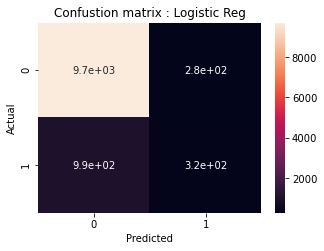

In [493]:
cm1 = confusion_matrix(y_test1,y_predict_1)
print(cm1)
plt.figure(figsize=(5,3.5))
sns.heatmap(cm1,annot=True)
plt.title("Confustion matrix : Logistic Reg")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [494]:
print(classification_report(y_test1,y_predict_1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9992
           1       0.53      0.25      0.34      1311

    accuracy                           0.89     11303
   macro avg       0.72      0.61      0.64     11303
weighted avg       0.86      0.89      0.87     11303



In [495]:
model_DT_1=tree.DecisionTreeClassifier()
model_DT_1.fit(x_train1,y_train1)
model_DT_1.score(x_train1,y_train1)

1.0

In [496]:
model_DT_1.score(x_test1,y_test1)

0.8534017517473237

In [497]:
y_predict_2=model_DT_1.predict(x_test1)
y_predict_2

array([0, 0, 0, ..., 0, 0, 0])

[[9115  877]
 [ 780  531]]


Text(24.0, 0.5, 'Actual')

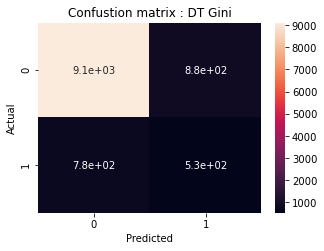

In [507]:
cm2 = confusion_matrix(y_test1,y_predict_2)
print(cm2)
plt.figure(figsize=(5,3.5))
sns.heatmap(cm2,annot=True)
plt.title("Confustion matrix : DT Gini")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [499]:
print(classification_report(y_test1,y_predict_2))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9992
           1       0.38      0.41      0.39      1311

    accuracy                           0.85     11303
   macro avg       0.65      0.66      0.65     11303
weighted avg       0.86      0.85      0.86     11303



In [500]:
RF=RandomForestClassifier()

In [502]:
Model_RF_1=RF.fit(x_train1,y_train1)

In [503]:
Model_RF_1.score(x_train1,y_train1)

0.9999410168691755

In [504]:
Model_RF_1.score(x_test1,y_test1)

0.8946297443156684

In [505]:
y_predict_3=Model_RF_1.predict(x_test1)
y_predict_3

array([0, 0, 1, ..., 0, 0, 0])

[[9744  248]
 [ 943  368]]


Text(24.0, 0.5, 'Actual')

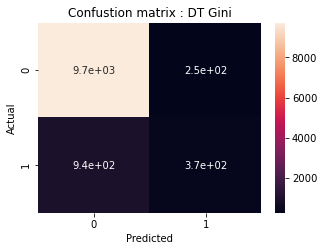

In [508]:
cm3 = confusion_matrix(y_test1,y_predict_3)
print(cm3)
plt.figure(figsize=(5,3.5))
sns.heatmap(cm3,annot=True)
plt.title("Confustion matrix : RF Gini")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [509]:
print(classification_report(y_test1,y_predict_3))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9992
           1       0.60      0.28      0.38      1311

    accuracy                           0.89     11303
   macro avg       0.75      0.63      0.66     11303
weighted avg       0.88      0.89      0.88     11303



In [511]:
df_x2=R_df_3[['age_bin','balance_bin','week_of_the_month','duration_bin','campaign','education_le','housing_le']]
df_x_merged2=pd.concat([df_x2,job_merged,marital_merged,contact_merged,month_merged],axis='columns')
df_x_merged2

,age_bin,balance_bin,week_of_the_month,duration_bin,campaign,education_le,housing_le,admin.,blue-collar,management,...,self-employed,services,technician,divorced,married,cellular,telephone,Q1,Q2,Q3
0,4,3,1,3,1,2,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,3,1,1,2,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,1,1,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,3,3,1,1,1,3,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,2,1,1,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,3,3,4,3,2,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
45207,5,3,3,3,2,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
45208,5,4,3,4,5,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
45209,4,2,3,3,4,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [513]:
df_y_merged

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_le, Length: 45211, dtype: int32

In [514]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df_x_merged2,df_y_merged,test_size=.25, random_state=10)

In [515]:
model_lor_2=lor.fit(x_train2,y_train2)
model_lor_2.score(x_train2,y_train2)

0.887725610475404

In [516]:
model_lor_2.score(x_test2,y_test2)

0.889586835353446

[[9781  211]
 [1037  274]]


Text(24.0, 0.5, 'Actual')

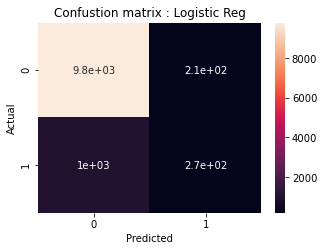

In [517]:
y_predict_2=model_lor_1.predict(x_test2)
cm6 = confusion_matrix(y_test2,y_predict_2)
print(cm6)
plt.figure(figsize=(5,3.5))
sns.heatmap(cm6,annot=True)
plt.title("Confustion matrix : Logistic Reg")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [518]:
print(classification_report(y_test2,y_predict_2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9992
           1       0.56      0.21      0.31      1311

    accuracy                           0.89     11303
   macro avg       0.73      0.59      0.62     11303
weighted avg       0.86      0.89      0.87     11303



In [519]:
Model_RF_2=RF.fit(x_train2,y_train2)

In [520]:
Model_RF_2.score(x_train2,y_train2)

0.9859915064291612

In [521]:
Model_RF_2.score(x_test2,y_test2)

0.8840130938688844

In [522]:
y_predict_4=Model_RF_2.predict(x_test2)
y_predict_4

array([0, 0, 0, ..., 0, 0, 0])

[[9608  384]
 [ 927  384]]


Text(24.0, 0.5, 'Actual')

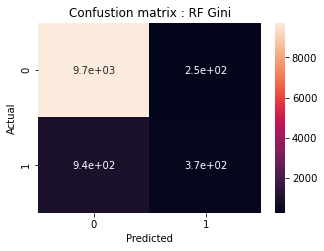

In [523]:
cm7 = confusion_matrix(y_test2,y_predict_4)
print(cm7)
plt.figure(figsize=(5,3.5))
sns.heatmap(cm3,annot=True)
plt.title("Confustion matrix : RF Gini")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [524]:
print(classification_report(y_test2,y_predict_4))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9992
           1       0.50      0.29      0.37      1311

    accuracy                           0.88     11303
   macro avg       0.71      0.63      0.65     11303
weighted avg       0.86      0.88      0.87     11303

